# Example for Lift Analysis

In [1]:
from matplotlib import pyplot as plt
from wingstructure import data, aero
import numpy as np

## Definition of wing

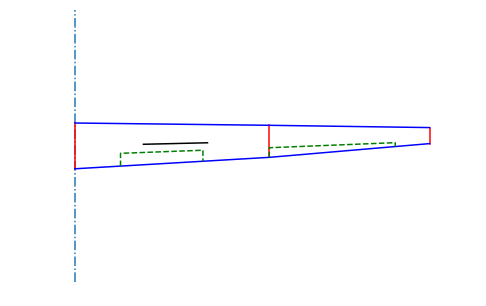

In [2]:
# create wing object
wing = data.Wing()

# add sections to wing
wing.add_section(data.Point(0.0, 0.0, 0.0), 1.0, 0.0)
wing.add_section(data.Point(0.05, 4.25, 0.0), 0.7, 0.0)
wing.add_section(data.Point(0.1, 7.75, 0.0), 0.35, 0.0)

# set fuselage with (=root of wing) to zero
wing.set_root_pos(0.0)

# define spoiler position
wing.set_spoiler(1.5, 2.9)

# define control-surfaces
wing.set_flap('flap', 1, 2.8,[0.7,0.7])
wing.set_flap('flap2', 4.25, 7, [0.7,0.8])

# display simple wing
plt.figure(figsize=(8,5))
wing.plot()
plt.savefig('wing.png')

## Define analysis object and calculate distributions

/home/jonathan/Programmieren/wingstructure/wingstructure/aero/analysis.py:33: UserWarning: No airfoil database defined, using default airfoil.
  warn('No airfoil database defined, using default airfoil.')


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


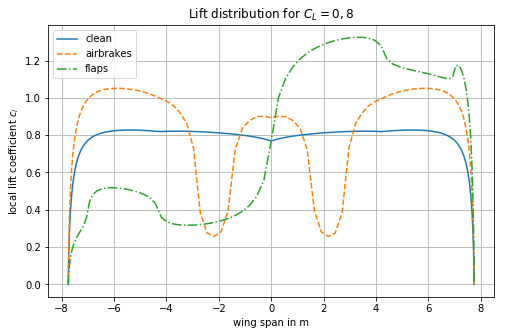

In [3]:
liftana = aero.LiftAnalysis(wing)

span_pos = liftana.calc_ys

α, distribution, C_Dib = liftana.calculate(C_L=0.8, return_C_Di=True)
α_qr, distribution_q, C_Dia = liftana.calculate(C_L=0.8, 
            flap_deflections={'flap2': [5, -5]}, return_C_Di=True)
α_ab, distribution_ab, C_Di = liftana.calculate(C_L=0.8, air_brake=True, return_C_Di=True)

plt.figure(figsize=(8,5))
plt.plot(span_pos, distribution, label='clean')
plt.plot(span_pos, distribution_ab, '--', label='airbrakes')
plt.plot(span_pos, distribution_q, '-.', label='flaps')
plt.xlabel('wing span in m')
plt.ylabel('local lift coefficient $c_l$')
plt.title('Lift distribution for $C_L = 0,8$')
plt.grid()
plt.legend()
plt.savefig('Liftdistribution.png')
plt.savefig('Liftdistribution.pdf')

In [4]:
from wingstructure.aero import multhop

In [5]:
res = multhop.calc_multhoplift(wing, 2.1)

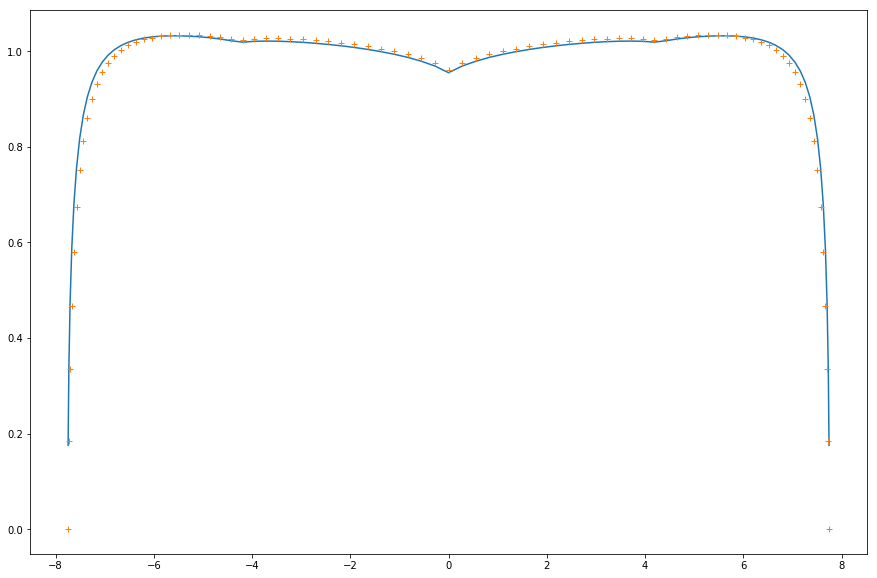

In [6]:
plt.figure(figsize=(15,10))
plt.plot(res['ys'], res['c_ls']/res['C_L'])
plt.plot(liftana.calc_ys, liftana.aoa_c_ls, '+')

In [7]:
distribution-res['c_ls']

array([ -2.10901917,  -3.875571  ,  -5.40665589,  -6.68424067,
        -7.72770504,  -8.56948034,  -9.24180656,  -9.77562951,
       -10.19753938, -10.53011963, -10.79162729, -10.99680138,
       -11.15723794, -11.28208262, -11.37846076, -11.45192634,
       -11.50680494, -11.54643095, -11.5734086 , -11.58969247,
       -11.5967994 , -11.59576535, -11.58733216, -11.57176587,
       -11.54899097, -11.51807437, -11.47657504, -11.44406385,
       -11.46374842, -11.46903941, -11.46554176, -11.45499574,
       -11.43856742, -11.41659863, -11.38934564, -11.35654596,
       -11.31794969, -11.27269892, -11.21994232, -11.15776546,
       -11.08407546, -10.9940568 , -10.88146979, -10.72487786,
       -10.88146979, -10.9940568 , -11.08407546, -11.15776546,
       -11.21994232, -11.27269892, -11.31794969, -11.35654596,
       -11.38934564, -11.41659863, -11.43856742, -11.45499574,
       -11.46554176, -11.46903941, -11.46374842, -11.44406385,
       -11.47657504, -11.51807437, -11.54899097, -11.57